# CMU 10-601 HW2 - Problem 2

The first estimator of $\theta$ that we consider is the maximum likelihood estimator. For any hypothetical value $\hat{\theta}$, we can compute the probability of observing the outcome $X_1$, . . . , $X_n$ if the true parameter value $\theta$ were
equal to $\hat{\theta}$. This probability of the observed data is often called the data likelihood, and the function L($\hat{\theta}$)
that maps each $\hat{\theta}$ to the corresponding likelihood is called the likelihood function. A natural way to estimate
the unknown parameter  is to choose the $\hat{\theta}$ that maximizes the likelihood function. Formally, $$\hat{\theta}^{MLE} = \underset{\hat{\theta}}{argmax} L(\hat{\theta})$$

a) Write a formula for the likelihood function, L($\hat{\theta}$). Your function should depend on the random variables 
$X_1$, . . . , $X_n$ and the hypothetical parameter $\hat{\theta}$. Does the likelihood function depend on the order of the random variables?

In [4]:
import matplotlib.pyplot as plt

# P(X = 1 | theta)
def L(theta, ones, zeros):
    return theta**ones * (1 - theta)**zeros

step = 0.01

Graph: theta_MLE =  0.6
Closed Form: theta_MLE =  0.6


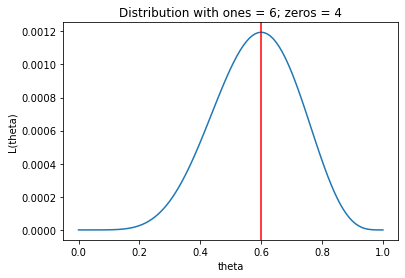

In [45]:
ones = 6
zeros = 4
p = []
thetas = []
for i in range(0, 101):
    p.append(L(i*step, ones, zeros))
    thetas.append(i*step)

plt.plot(thetas, p)
plt.title("Distribution with ones = 6; zeros = 4")
plt.ylabel("L(theta)")
plt.xlabel("theta")

p_max = max(p)
theta_MLE = thetas[p.index(p_max)]
print("Graph: theta_MLE = ", theta_MLE)
print("Closed Form: theta_MLE = ", ones/(ones+zeros))
plt.axvline(x=theta_MLE, c='r', label="MLE")

plt.show()

theta_MLE =  0.6
Closed Form: theta_MLE =  0.6


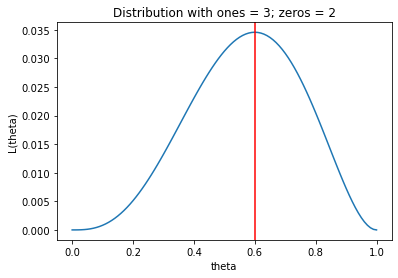

In [46]:
ones = 3
zeros = 2
p = []
thetas = []
for i in range(0, 101):
    p.append(L(i*step, ones, zeros))
    thetas.append(i*step)

plt.plot(thetas, p)
plt.title("Distribution with ones = 3; zeros = 2")
plt.ylabel("L(theta)")
plt.xlabel("theta")

p_max = max(p)
theta_MLE = thetas[p.index(p_max)]
print("theta_MLE = ", theta_MLE)
print("Closed Form: theta_MLE = ", ones/(ones+zeros))
plt.axvline(x=theta_MLE, c='r', label="MLE")

plt.show()

theta_MLE =  0.6
Closed Form: theta_MLE =  0.6


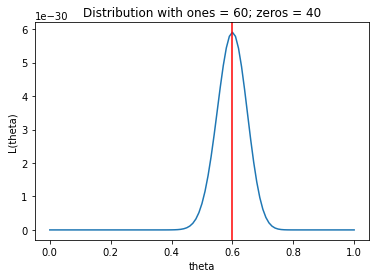

In [71]:
ones = 60
zeros = 40
p = []
thetas = []
for i in range(0, 101):
    p.append(L(i*step, ones, zeros))
    thetas.append(i*step)

plt.plot(thetas, p)
plt.title("Distribution with ones = 60; zeros = 40")
plt.ylabel("L(theta)")
plt.xlabel("theta")

p_max = max(p)
theta_MLE = thetas[p.index(p_max)]
print("theta_MLE = ", theta_MLE)
print("Closed Form: theta_MLE = ", ones/(ones+zeros))
plt.axvline(x=theta_MLE, c='r', label="MLE")

plt.show()

MAP Estimate

theta_MAP =  0.56
Closed Form: theta_MAP =  0.5625


NameError: name 'theta_MLE' is not defined

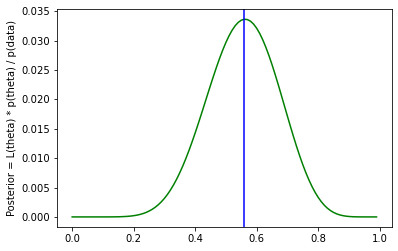

In [3]:
import matplotlib.pyplot as plt

def likelihood_integral(ones, zeros, step, is_LH=0, ones_prior=1, zeros_prior=1, prior_likelihood_integral=1):
    likelihood_integral = 0
    for i in range(0, int(1//step) + 1):
        theta = step*i
        likelihood_integral += likelihood(ones, zeros, theta, step) * beta(ones_prior, zeros_prior, theta, prior_likelihood_integral)**is_LH
    return likelihood_integral

def likelihood(ones, zeros, theta, step):
    return theta**ones * (1 - theta)**zeros

def beta(ones_prior, zeros_prior, theta, prior_likelihood_integral):
    return likelihood(ones_prior, zeros_prior, theta, step) / prior_likelihood_integral

ones, zeros = 6, 4
ones_prior, zeros_prior = 3, 3
step = 0.01

prior_likelihood_integral = likelihood_integral(ones_prior, zeros_prior, step)
posterior_likelihood_integral = likelihood_integral(ones, zeros, step, 1, ones_prior, zeros_prior, prior_likelihood_integral)
posterior = []
thetas = []
for i in range(0, int(1//step) + 1):
    theta = i * step
    posterior.append(likelihood(ones, zeros, theta, step)
                    * beta(ones_prior, zeros_prior, theta, prior_likelihood_integral)
                    / posterior_likelihood_integral)
    thetas.append(theta)

plt.plot(thetas, posterior, 'g')
plt.ylabel("Posterior = L(theta) * p(theta) / p(data)")
p_max = max(posterior)
theta_MAP = thetas[posterior.index(p_max)]
print("Graphically: theta_MAP = ", theta_MAP)
print("Closed Form: theta_MAP = ", (ones + ones_prior)/(ones+ones_prior+zeros+zeros_prior))
plt.axvline(x=theta_MAP, c='b', label="MAP")

print("Graphically: theta_MLE = ", theta_MLE)
print("Closed Form: theta_MLE = ", ones/(ones+zeros))
plt.axvline(x=theta_MLE, c='r', label="MLE")
plt.show()
